In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, stats
import sklearn.preprocessing

import env
import wrangle as w


1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
train, validate, test = w.split_clean_zillow()
train = train.drop(columns=['orange', 'ventura'])

10779 outliers removed from bedroom.
23346 outliers removed from bathroom.
8473 outliers removed from area.
32008 outliers removed from property_value.
1817 outliers removed from year.
41647 outliers removed from tax.

Total of 118070 outliers removed.


In [6]:
# get 10% of train 
sample = train.sample(frac=0.1)

In [7]:
sample

,bedroom,bathroom,area,property_value,year,tax,fips
763214,4.0,2.5,2076.0,535721.0,1986.0,5565.00,Orange
1951941,4.0,2.0,1657.0,66101.0,1948.0,890.32,LA
1357669,3.0,1.0,1115.0,310666.0,1952.0,3975.52,LA
2118570,4.0,3.0,1795.0,385591.0,1963.0,4617.24,Orange
2047255,3.0,2.0,1254.0,414212.0,1959.0,5165.48,LA
...,...,...,...,...,...,...,...
1193078,4.0,4.0,2565.0,687000.0,1955.0,8006.62,Orange
2109807,4.0,4.0,3418.0,1310000.0,1966.0,14083.16,Ventura
4634,3.0,1.0,960.0,177443.0,1912.0,2675.18,LA
1825701,5.0,3.0,2842.0,804035.0,1972.0,9434.37,LA


In [108]:
train_corr = train.corr()
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()

,bedroom,bathroom,area,property_value,year,tax,fips,bathroom_type,bathroom_whole
1493412,3.0,4.0,2756.0,479475.0,1994.0,5850.44,LA,full,1
993886,1.0,1.0,731.0,291201.0,1922.0,4022.78,LA,full,1
1328773,3.0,1.0,1124.0,53377.0,1921.0,690.77,LA,full,1
768173,5.0,4.0,2958.0,147709.0,1941.0,1837.50,LA,full,1
915439,3.0,1.0,1102.0,231304.0,1951.0,2466.62,Ventura,full,1
...,...,...,...,...,...,...,...,...,...
1985890,3.0,2.0,1200.0,278239.0,1970.0,3345.26,LA,full,1
1515851,4.0,2.0,1472.0,101679.0,1970.0,2004.16,Orange,full,1
68495,3.0,2.0,1201.0,95928.0,1958.0,1427.70,LA,full,1
264950,2.0,2.0,2061.0,517882.0,1956.0,6570.83,LA,full,1


* Suprised to see that bathroom and bedroom didn't have a higer correlation when compared to area and bathroom

In [9]:
r, p_value = spearmanr(train.bedroom, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2486196939859788
P-value: 0.0


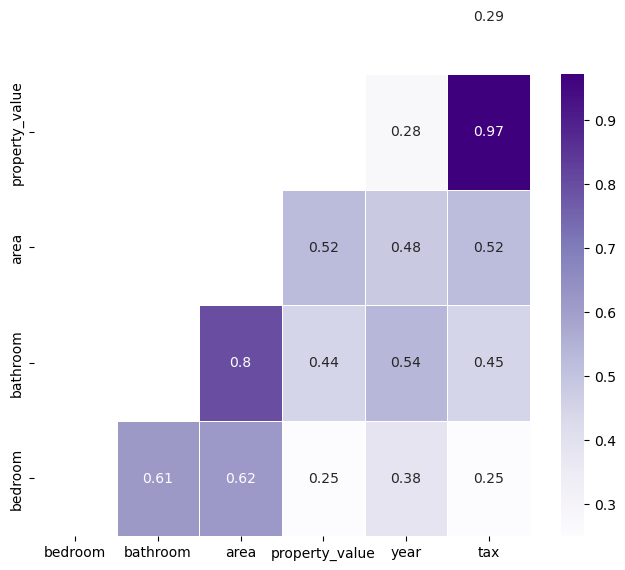

In [109]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()


* We fail to reject the null hypothesis the correlation coefficient is too low

# Null Hypothesis
There is no correlation between tax and property value 
There is no correlation between area and property value 
There is no correlation between bathroom and property value 
# alternate hypothesis
tax is correlated to property_value
area is correlated to property_value
bathroom is correlated to property_value

In [8]:
r, p_value = spearmanr(train.tax, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9755164321896487
P-value: 0.0


* We reject the null hypothesis the correlation coefficient has a high positive correlation with the target variable

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [104]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind="reg", corner=True)
    plt.show()

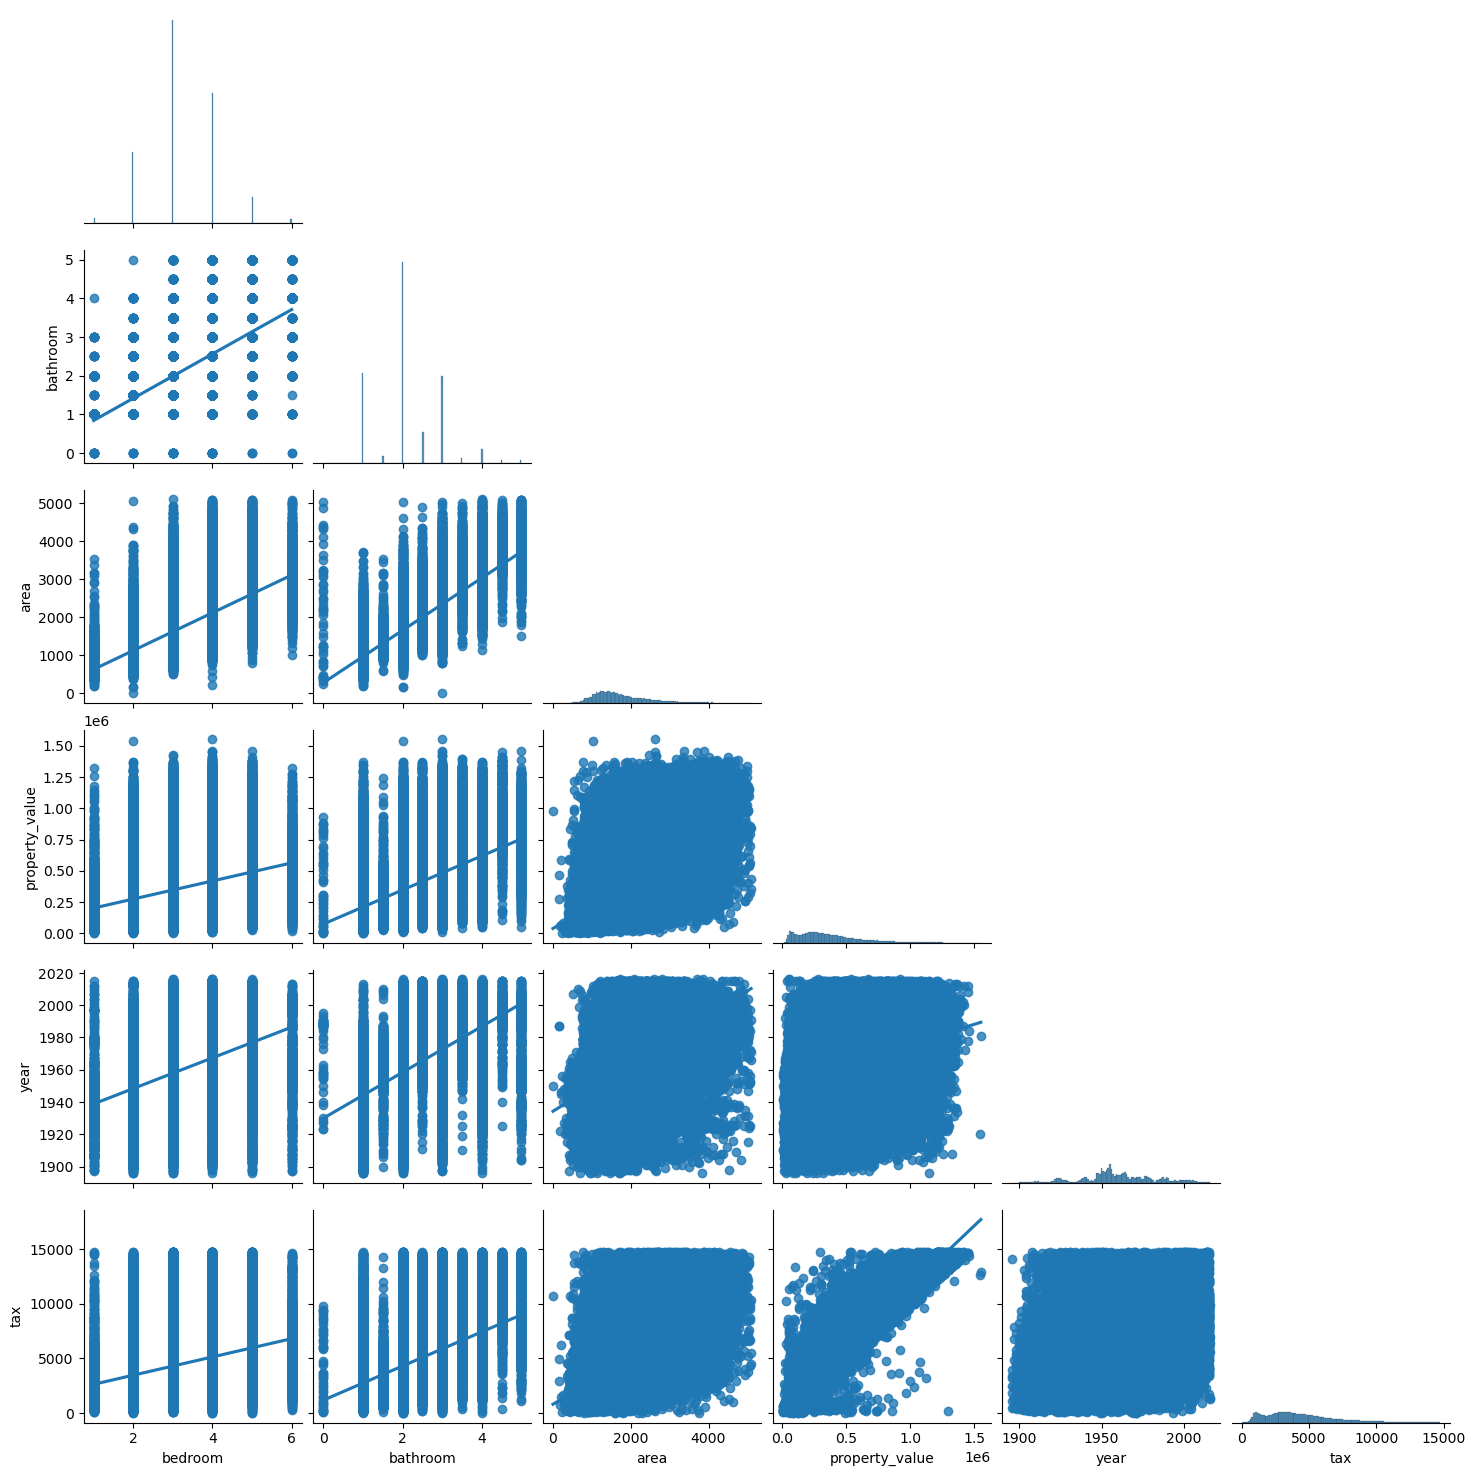

In [105]:
plot_variable_pairs(sample)

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [59]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 6))

    # Bar plot
    sns.barplot(x=categorical_var, y=continuous_var, data=df, ax=ax1)
    
    ax1.tick_params(axis='x', rotation=45)

    # Box plot
    sns.boxplot(x=categorical_var, y=continuous_var, data=df, ax=ax2)
    ax2.tick_params(axis='x', rotation=45)
    
    # Violin plot
    sns.violinplot(x=categorical_var, y=continuous_var, data=df, ax=ax3)
    ax3.tick_params(axis='x', rotation=45)
    
    plt.show()




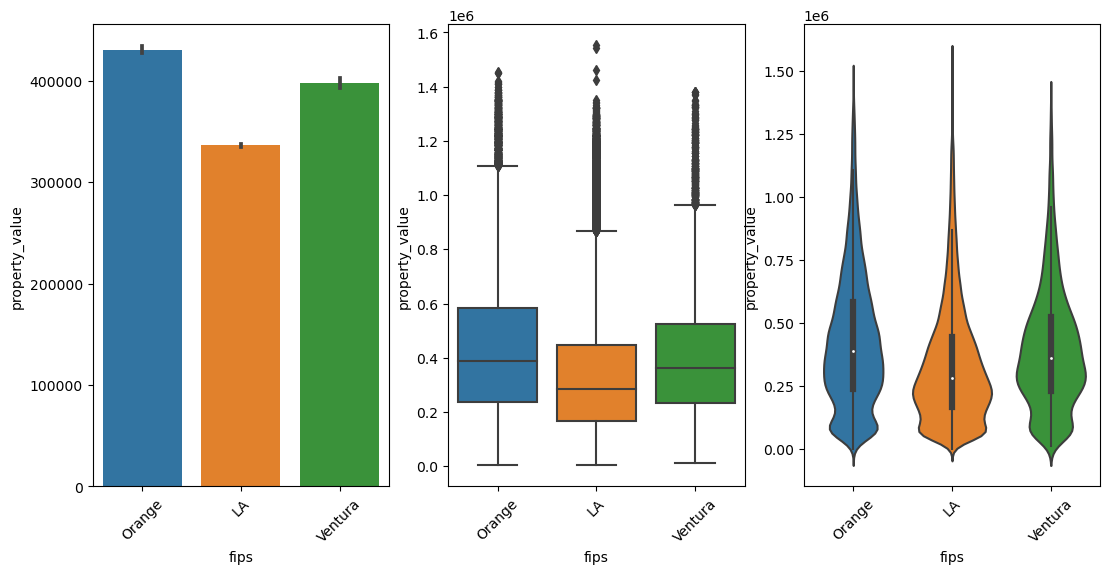

In [60]:
plot_categorical_and_continuous_vars(sample, sample.fips, sample.property_value)

In [222]:
# define the decade bins
decade_bins = range(1895, 2016, 5)

# create a new column with the decade bins
train['decade'] = pd.cut(train['year'], bins=decade_bins, labels=decade_bins[:-1])

# print the resulting dataframe

pd.DataFrame(train)

,bedroom,bathroom,area,property_value,year,tax,fips,bathroom_type,bathroom_whole,decade
1493412,3.0,4.0,2756.0,479475.0,1994.0,5850.44,LA,full,1,1990
993886,1.0,1.0,731.0,291201.0,1922.0,4022.78,LA,full,1,1920
1328773,3.0,1.0,1124.0,53377.0,1921.0,690.77,LA,full,1,1920
768173,5.0,4.0,2958.0,147709.0,1941.0,1837.50,LA,full,1,1940
915439,3.0,1.0,1102.0,231304.0,1951.0,2466.62,Ventura,full,1,1950
...,...,...,...,...,...,...,...,...,...,...
1985890,3.0,2.0,1200.0,278239.0,1970.0,3345.26,LA,full,1,1965
1515851,4.0,2.0,1472.0,101679.0,1970.0,2004.16,Orange,full,1,1965
68495,3.0,2.0,1201.0,95928.0,1958.0,1427.70,LA,full,1,1955
264950,2.0,2.0,2061.0,517882.0,1956.0,6570.83,LA,full,1,1955


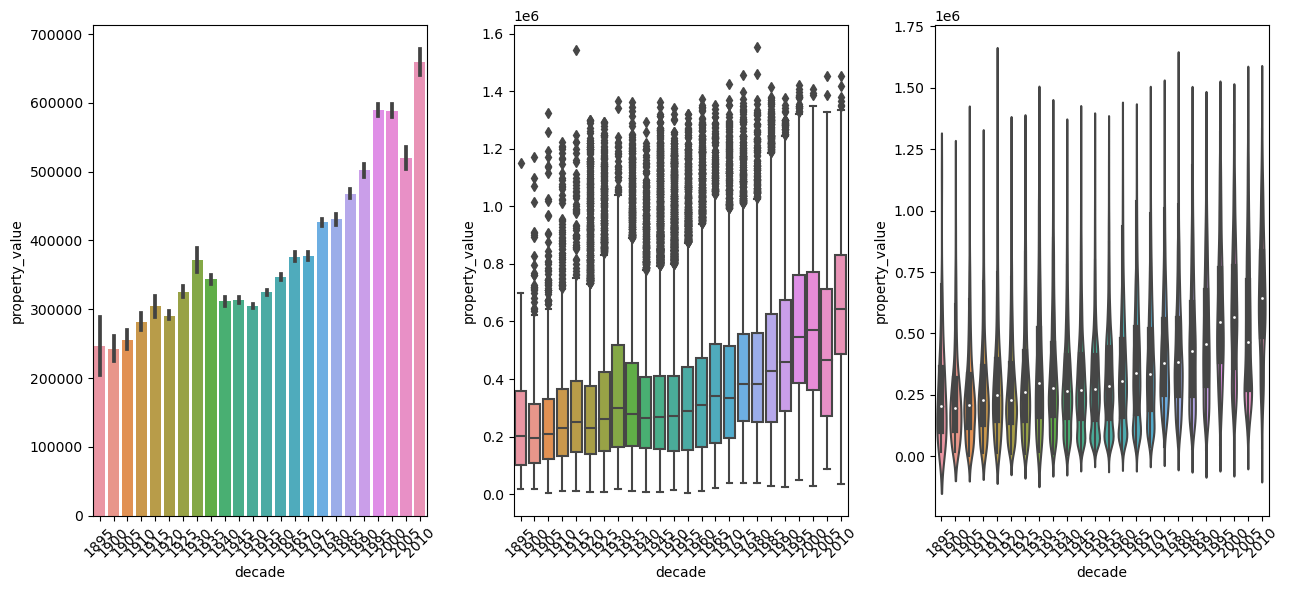

In [58]:
plot_categorical_and_continuous_vars(sample, sample.decade, sample.property_value)

* dip from the 1930 -1940s and then continues to incline then dips at 2000s-2005

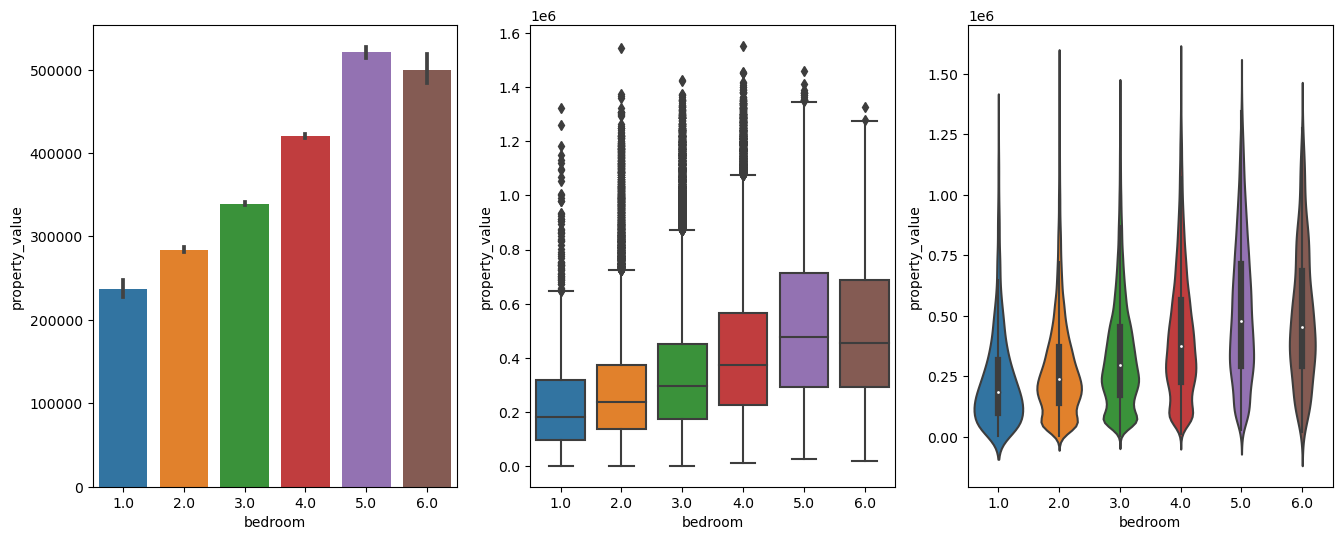

In [15]:
plot_categorical_and_continuous_vars(sample, sample.bedroom, sample.property_value)

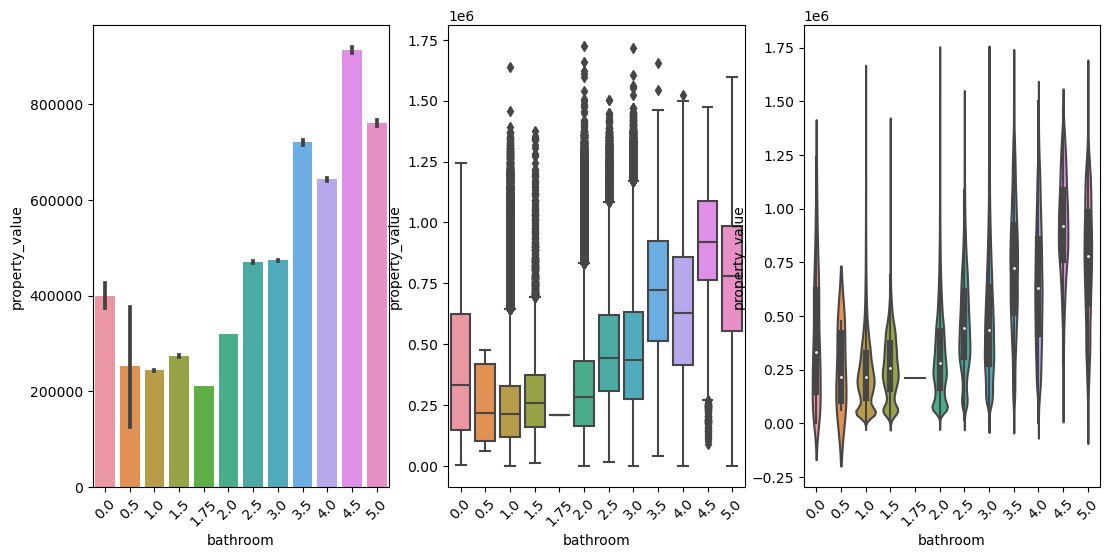

In [228]:
plot_categorical_and_continuous_vars(train, train.bathroom, train.property_value)

* 2.5 ba are as expensive as 3 ba and 4.5 is more expensive than homes with 5 ba
* 1 home that has a 1.75 

In [233]:
def categorize_bathrooms(bathrooms):
    if bathrooms.is_integer():
        return 'full'
    else:
        return 'half'

# create a new column with the categorized bathrooms
train['bathroom_type'] = train['bathroom'].apply(categorize_bathrooms)

In [88]:
prop_full_ba = train[train.bathroom_type == "full"].property_value
prop_half_ba = train[train.bathroom_type == "half"].property_value

In [234]:
train[train.bathroom == 1.75 ]

,bedroom,bathroom,area,property_value,year,tax,fips,bathroom_type,bathroom_whole,decade
159704,2.0,1.75,1180.0,211034.0,1954.0,2763.18,Orange,half,0,1950


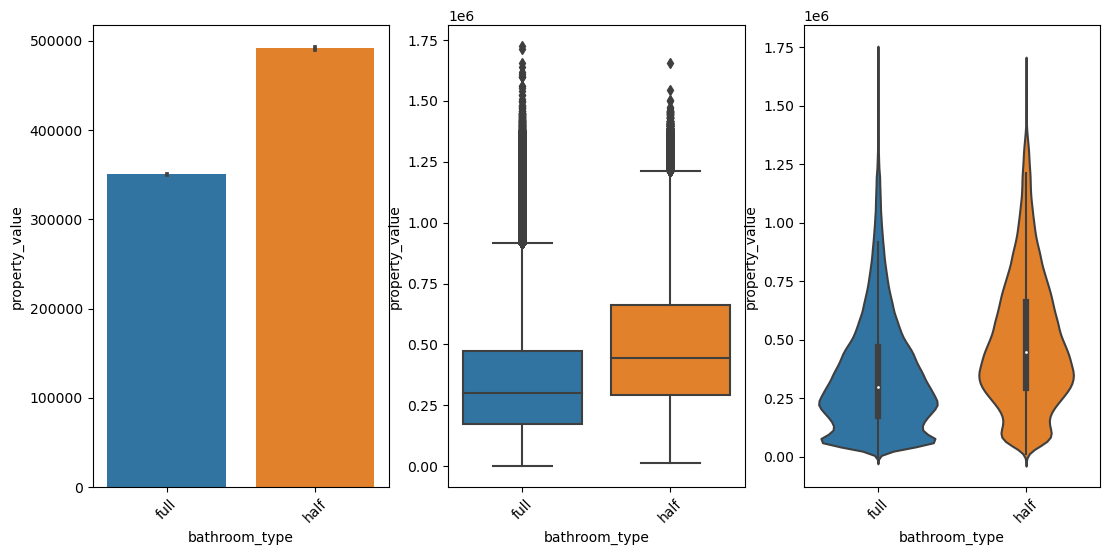

In [218]:
plot_categorical_and_continuous_vars(train, train.bathroom_type, train.property_value)

## Null Hypothesis: Mean of property value with half bathrooms <= mean of property value with whole bathrooms

## Alternate Hypothesis: Mean of property value with half bathrooms > mean of property value with whole bathrooms

In [98]:
alpha = 0.05

In [89]:
# variances not equal 
print(prop_full_ba.var())
print(prop_half_ba.var())

57475730904.599396
76001383629.6007


In [101]:
t, p = stats.ttest_ind(prop_half_ba, prop_full_ba, equal_var=False)


(172.11240807921425, 0.0)

In [145]:
if p/2 > alpha:
    print(f"We fail to reject Null Hypothesis")

elif t < 0:
    print("We fail to reject Null Hypothesis")
else:
    print("We reject Null Hypothesis")

We reject Null Hypothesis


* We reject the null hypothesis homes with half bathrooms have higher property value than home with whole bathrooms

## Null Hypothesis: Mean of property value for homes in orange county <= mean of property value or homes in other counties

## Alternate Hypothesis: Mean of property value for homes in orange county > mean of property value or homes in other counties

In [125]:
train.fips.value_counts()

LA         807870
Orange     310794
Ventura     94635
Name: fips, dtype: int64

In [137]:
orange_sample = train[train.fips == 'Orange'].property_value
overall_mean = train.property_value.mean()

In [142]:
t, p2 = stats.ttest_1samp(orange_sample, overall_mean)

In [134]:
if p2/2 > alpha:
    print("We fail to reject Null Hypothesis")
elif t < 0:
    print("We fail to reject Hypothesis")
else:
    print("We reject Hypothesis")


We reject $H_{0}$


* We reject the null hypothesis homes in orange county have a higher property value than homes in other counties

In [185]:
def samp_test(sample, overall_mean, alpha=0.05):
    t, p = stats.ttest_1samp(sample, overall_mean)
    if p/2 > alpha:
        print(f"We fail to reject Null Hypothesis")
        
    elif t < 0:
        print("We fail to reject Null Hypothesis")
    else:
        print("We reject Null Hypothesis")


In [144]:
samp_test(orange_sample, overall_mean)

We reject Hypothesis


## Null Hypothesis: Mean of property value for homes with 1 bedroom in LA county <= mean of property value of homes with 1 bedroom in other counties

## Alternate Hypothesis: Mean of property value for homes with 1 bedroom in LA county > mean of property value of homes with 1 bedroom in other counties

In [212]:
train[train.bathroom == 1].fips.value_counts()

LA         216028
Orange      21913
Ventura      7294
Name: fips, dtype: int64

In [213]:
la_subset = train[train.fips == "LA"]
overall_subset = train[train.fips != "LA"]

In [214]:
la_ba1 = la_subset[la_subset.bathroom == 1].property_value
overall_ba1 = overall_subset[overall_subset.bathroom == 1].property_value.mean()

In [215]:
samp_test(la_ba1, overall_ba1)

We fail to reject Null Hypothesis


In [216]:
la_ba1.mean()

240756.83092932397

In [217]:
la_subset = train[train.fips == "LA"].property_value.mean()
o_subset = train[train.fips == "Orange"].property_value.mean()
v_subset = train[train.fips == "Ventura"].property_value.mean()

In [211]:
la_subset, o_subset, v_subset

(336120.3504363326, 428913.73334427306, 398582.47413747554)

In [238]:
df = w.get_df()
df

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [295]:
def split_scale(df):
    """
    Remove nulls froms DataFrame.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    
    Returns:
    pandas.DataFrame: The DataFrame split into train, validate, test with nulls, outliers removed, and scaled on minmax.
    """
    df = df.dropna()
    df = df.drop(columns=["Unnamed: 0"])
    # rename columns 
    df = df.rename(columns={"bedroomcnt": "bedroom",
                        	"bathroomcnt": "bathroom",
                            "calculatedfinishedsquarefeet": "area",
                            "taxvaluedollarcnt": "value",
                            "yearbuilt": "year",
                            "taxamount": "tax"})
    df["fips"] = df.fips.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})
    dummy_df = pd.get_dummies(df[["fips"]], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df = df.rename(columns={"fips_Orange": "orange", "fips_Ventura": "ventura"})
    df = df.drop(columns=["fips", "value"])
    df = remove_outliers(df)
    df = pd.DataFrame(df)
    df = df[["bedroom", "bathroom", "area", "year", "tax", "orange", "ventura"]]
    train, validate, test = split_data(df)
    # Scale train, validate, and test
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)


    x_train_scaled = scaler.transform(train)
    x_validate_scaled = scaler.transform(validate)
    x_test_scaled = scaler.transform(test)
    
    # Convert the array to a DataFrame
        
    df_x_train_scaled = pd.DataFrame(x_train_scaled)
    x_train_scaled = df_x_train_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    df_x_validate_scaled = pd.DataFrame(x_validate_scaled)
    x_validate_scaled = df_x_validate_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    df_x_test_scaled = pd.DataFrame(x_test_scaled)
    x_test_scaled = df_x_test_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    return x_train_scaled, x_validate_scaled, x_test_scaled
    




def remove_outliers(df, exclude_column=None, sd=3):
    """
    Remove outliers from a pandas DataFrame using the Z-score method.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    
    Returns:
    pandas.DataFrame: The DataFrame with outliers removed.
    """
    num_outliers_total = 0
    for column in df.columns:
        if column == exclude_column:
            continue
        series = df[column]
        z_scores = np.abs(stats.zscore(series))
        num_outliers = len(z_scores[z_scores > sd])
        num_outliers_total += num_outliers
        df = df[(z_scores <= sd) | pd.isnull(df[column])]
        print(f"{num_outliers} outliers removed from {column}.")
    print(f"\nTotal of {num_outliers_total} outliers removed.")
    return df
def split_data(df):
    '''
    Takes in two arguments the dataframe name and the ("stratify_name" - must be in string format) to stratify  and 
    return train, validate, test subset dataframes will output train, validate, and test in that order
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2, 
                                   random_state=123)
    train, validate = train_test_split(train, #second split
                                    test_size=.25, 
                                    random_state=123)
    return train, validate, test

def mm_scale(df):
    train, validate, test = split_scale(df)
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)


    x_train_scaled = scaler.transform(train)
    x_validate_scaled = scaler.transform(validate)
    x_test_scaled = scaler.transform(test)
    
    # Convert the array to a DataFrame
    df_x_train_scaled = pd.DataFrame(x_train_scaled)
    x_train_scaled = df_x_train_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    df_x_validate_scaled = pd.DataFrame(x_validate_scaled)
    x_validate_scaled = df_x_validate_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    df_x_test_scaled = pd.DataFrame(x_test_scaled)
    x_test_scaled = df_x_test_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'area', 3: 'year', 4: 'tax', 5: 'orange', 6:'ventura'})
    
    return x_train_scaled, x_validate_scaled, x_test_scaled


In [296]:
ts, v, t = split_scale(df)

10779 outliers removed from bedroom.
23346 outliers removed from bathroom.
8473 outliers removed from area.
1828 outliers removed from year.
32318 outliers removed from tax.
0 outliers removed from orange.
159471 outliers removed from ventura.

Total of 236215 outliers removed.


In [300]:
ts



,bedrooms,bathrooms,area,year,tax,orange,ventura
0,0.4,0.6,0.514129,0.741667,0.652352,1.0,0.0
1,0.2,0.2,0.181515,0.408333,0.137859,0.0,0.0
2,0.6,0.4,0.236068,0.491667,0.126646,0.0,0.0
3,0.4,0.4,0.251570,0.491667,0.148935,1.0,0.0
4,0.2,0.2,0.175039,0.250000,0.186430,0.0,0.0
...,...,...,...,...,...,...,...
1142407,0.2,0.2,0.117543,0.233333,0.259030,0.0,0.0
1142408,0.6,0.4,0.339678,0.466667,0.172693,0.0,0.0
1142409,0.4,0.4,0.266680,0.591667,0.152375,1.0,0.0
1142410,0.8,0.9,0.627943,0.908333,0.600201,1.0,0.0
